Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Shift+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


---

Quelques conseils:
- pour exécutez une cellule, cliquez sur le bouton *Exécuter* ci-dessus ou tapez **Ctrl+Enter**
- si l'exécution d'une cellule prend trop de temps, sélectionner dans le menu ci-dessus *Noyau/Interrompre*
- en cas de très gros plantage *Noyau/Redémarrer*
- **sauvegardez régulièrement vos réponses** en cliquant sur l'icone disquette ci-dessus à gauche, ou *Fichier/Créer une nouvelle sauvegarde*

Pour répondre aux questions, remplacer les lignes ci-dessous par vos réponses: 
```python 
#LA REPONSE ICI
raise NotImplementedError()
``` 


# TD 9: Révisions

## TD3 - Exercice 4 : matrice de Vandermonde

La matrice de Vandermonde est une matrice avec une progression géométrique dans chaque ligne. est une matrice carrée de taille $n\times n$ de la forme suivante:
$$ V={\begin{pmatrix}1&\alpha _{1}&{\alpha _{1}}^{2}&\dots &{\alpha _{1}}^{{n-1}}\\1&\alpha _{2}&{\alpha _{2}}^{2}&\dots &{\alpha _{2}}^{{n-1}}\\1&\alpha _{3}&{\alpha _{3}}^{2}&\dots &{\alpha _{3}}^{{n-1}}\\\vdots &\vdots &\vdots &&\vdots \\1&\alpha _{m}&{\alpha _{m}}^{2}&\dots &{\alpha _{m}}^{{n-1}}\\\end{pmatrix}} $$
Dans la suite on s'intéressse uniquement aux matrices de Vandermonde carrées ($m=n$)

- Créer une matrice de Vandermonde de taille $N=8$ en prenant $\alpha_i=i$.


In [33]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [10]:
def VanderI(N):
    y=np.arange(1,9)
    V= np.zeros((8,8))
    for i in np.arange(0,8):
        V[i]= y**i
    V=np.transpose(V)
    return V

V8=VanderI(8)
print(V8)

[[1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00 1.000000e+00
  1.000000e+00 1.000000e+00 1.000000e+00]
 [1.000000e+00 2.000000e+00 4.000000e+00 8.000000e+00 1.600000e+01
  3.200000e+01 6.400000e+01 1.280000e+02]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01 8.100000e+01
  2.430000e+02 7.290000e+02 2.187000e+03]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01 2.560000e+02
  1.024000e+03 4.096000e+03 1.638400e+04]
 [1.000000e+00 5.000000e+00 2.500000e+01 1.250000e+02 6.250000e+02
  3.125000e+03 1.562500e+04 7.812500e+04]
 [1.000000e+00 6.000000e+00 3.600000e+01 2.160000e+02 1.296000e+03
  7.776000e+03 4.665600e+04 2.799360e+05]
 [1.000000e+00 7.000000e+00 4.900000e+01 3.430000e+02 2.401000e+03
  1.680700e+04 1.176490e+05 8.235430e+05]
 [1.000000e+00 8.000000e+00 6.400000e+01 5.120000e+02 4.096000e+03
  3.276800e+04 2.621440e+05 2.097152e+06]]


- Calculer son déterminant avec `numpy`. Vérifier que celui-ci est nul si deux $\alpha_i$ sont égaux.

In [13]:
V8=VanderI(8)
det=np.linalg.det(V8)
print(det)

V8[6]=V8[2]
det=np.linalg.det(V8)
print(det)

125411327999.87553
-0.01203976571560576


- Un calcul classique d'algèbre en licence consiste à prouver que le déterminant d'une matrice de Vandermonde a pour formule analytique:
$$   \det(V)=\prod _{{1\leq i<j\leq n}}(\alpha _{j}-\alpha _{i}) $$
Créer une fonction qui `determinant_analtyique(V)` qui calcule le déterminant d'une matrice de Vandermonde `V` par la formule analytique.

In [30]:
def deter_ana(V) :
    n=len(V)
    det =1
    for j in range(n):
        for i in range(j+1,n):
            det = det * (V[j][1]-V[i][1])
    return det
    

- Comparer le résultat obtenu par cette formule et celui fourni par `numpy` pour des tailles de matrice `N` allant de 2 à 20. On présentera la différence relative sous forme de graphique.

[9.92461721e-13 9.92461721e-13 9.92461721e-13 9.92461721e-13
 9.92461721e-13 9.92461721e-13 9.92461721e-13 9.92461721e-13
 9.92461721e-13 9.92461721e-13 9.92461721e-13 9.92461721e-13
 9.92461721e-13 9.92461721e-13 9.92461721e-13 9.92461721e-13
 9.92461721e-13 9.92461721e-13 9.92461721e-13]


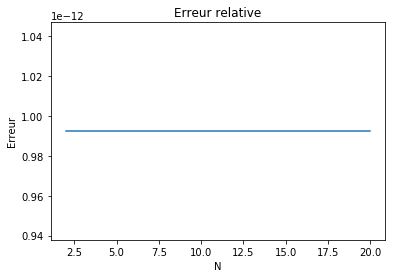

In [38]:
Er=np.zeros(19)
n=np.arange(2,21)

for N in n:
    V= VanderI(N)
    Dn=np.linalg.det(V)
    Da=deter_ana(V)
    Er[N-2]=np.abs(Dn-Da)/Da
print(Er) 

fig=plt.figure()
plt.plot(n,Er)
plt.title('Erreur relative')
plt.xlabel('N')
plt.ylabel('Erreur')
plt.show()

- Pour `N=15` comparer le temps d'exécution des deux formules à l'aide du module `time`.

In [32]:
V=VanderI(N)

tac=time.clock()
Dn=np.linalg.det(V)
tic=time.clock()
timeN=tic-tac
print('Dn=',Dn,'time:',timeN)

tac=time.clock()
Da=deter_ana(V)
tic=time.clock()
timeA=tic-tac
print('Da=',Da,'time:',timeA)

Err=np.abs(Dn-Da)/Da
DifT= np.abs(timeN-timeA)
print('Err=',Err, 'DifT:',DifT)

Dn= 125411327999.87553 time: 0.00012199999999995548
Da= 125411328000.0 time: 8.499999999989072e-05
Err= 9.92461720705266e-13 DifT: 3.700000000006476e-05


- La morale de cet exercice est qu'il est quasiment toujours préférable de coder la réponse analytique d'un problème complexe (en terme de précision du résultat, de rapidité, voir de mémoire) que d'utiliser des fonctions génériques à l'aveugle.

## TD4 - Exercice 7: Principe de Fermat

<img align="center" src="data/descartes.png" width="40%" />

Imaginons que l'on veuille chercher le point d'intersection d'un rayon lumineux avec un dioptre plan en utilisant la loi de Descartes : le rayon part de la coordonnées $(-a,y)$ dans un milieu d'indice $n_1$ pour arriver en un point de coordonnées symétrique $(a,-y)$ dans un milieu d'indice $n_2$ en passant par le dioptre au point de coordonnées $(x,0)$. L'inconnue du problème est le point d'impact sur le dioptre $ x $. 

La loi de Descartes s'écrit évidemment $ n_1 \sin i_1 - n_2 \sin i_2 = 0$. Un peu de trigonométrie élémentaire donne :

$$ i_1 = \arctan \frac{a+x}{y},\quad  i_2 = \arctan \frac{a-x}{y}$$ 

Ainsi nous avons à rechercher la racine de la fonction :

$$ f(x) = n_1 \sin \left(\arctan \frac{a+x}{y}\right) - n_2 \sin\left( \arctan \frac{a-x}{y}\right) $$

avec : $$ \sin \left(\arctan z\right) = \frac{z}{\sqrt{1+z^2}} $$

La dérivée de f vaut alors :

$$ f'(x) = \frac{n_1}{y} \frac{1}{\left(1+\left(\frac{a+x}{y}\right)^2\right)^{3/2}} + \frac{n_2}{y} \frac{1}{\left(1+\left(\frac{a-x}{y}\right)^2\right)^{3/2}}  $$

- Par une méthode de Newton, calculer le point d'impact $x$ des rayons lumineux sur le dioptre.



In [44]:
sina= lambda x : x/(1+x**2)**0.5

der_sina= lambda z : 1/(1+z**2)**(3/2)

def f(x,y=1,a=2,n1=1,n2=1.3):
    return n1*sina((a+x)/y) - n2*sina((a-x)/y)

def der_f(x,y=1,a=2,n1=1,n2=1.3):
    return n1*der_sina((a+x)/y)/y + n2*der_sina((a-x)/y)/y


In [45]:
def newt(f, fd, xo, e):
    X1=xo
    X2=xo-f(xo)/fd(xo)
    
    while np.abs(X2-X1)>e :
        X1=X2
        X2=X1-f(X1)/fd(X1)
    return X2


X=newt(f, der_f, 0, 10**-5)
print(X)
    

0.9375223113419106


- Le temps de trajet $t(x)$ entre le point de départ et le point d'arrivée des rayons lumineux vaut :

$$ ct(x) = n_1 \sqrt{(a+x)^2+y^2} + n_2 \sqrt{(a-x)^2+y^2}$$

Montrer numériquement que le minimum de la fonction  $t(x)$  correspond au point d'impact $x $ trouvé précédemment. Qu'est-ce que cela nous apprend sur la propagation des rayons lumineux ?


In [ ]:
def minimum(f,a,b,N):
    X= np.linspace(a,b,N)
    Y=f(X)
    return X[np.argmin(Y)]

## TD5 - Exercice 4: Spectre solaire 

Le fichier solar_spectrum.csv contient des données permettant de reconstituer le spectre de la lumière émise par le soleil. La première colonne est la longueur d'onde $\lambda$ en nm, la seconde est l'irradiance spectrale en $W.m^{-2}.nm^{-1}$ correspondant à cette longueur d'onde.

Peut-on modéliser ce spectre par un spectre de corps noir, et si oui, quelle est la température $T$ de ce corps noir ?   

On donne le spectre du corps noir:

$$ E(\lambda)=\frac{A}{\lambda^5} \frac{1}{e^{hc/(\lambda k_B T)}-1} (W.m^{-2}.nm^{-1})$$ 

- $E(\lambda)$ est l'irradiance spectrale du corps noir
- $\lambda$ est la longueur d'onde de la lumière
- $A$ est une constante
- $h$ est la constante de Planck
- $k_B$ la constante de Boltzmann
- $c$ la vitesse de la lumière
- $T$ la température du corps noir. 

Remarque: si la fonction d'ajustement des données par le modèle de corps noir ne converge pas, ou donne des résultats très éloignés des données expérimentales, ne pas hésiter à "aider" l'algorithme en règlant les paramètres initiaux. Par exemple, un ordre de grandeur de $A/\lambda^5$ est la valeur approchée du maximum de la courbe expérimentale. De même, vous pouvez donner comme valeur initiale de $T$ un ordre de grandeur de la température du soleil... 

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

### Questions bonus :

La température du soleil est estimée à T = 5778 K. Fixer la température du corps noir à cette valeur et déterminer la meilleure irradiance reproduisant les données jusqu'à 500 nm.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Comparez les résidus au premier ajustement avec ceux du second

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Interprétez ces résidus : quelles sont leurs caractéristiques observées ?

YOUR ANSWER HERE

## Produit de convolution 1D : Convolution par une gaussienne et échantillonnage

Créer une fonction retournant un signal de longueur 90 unités avec trois créneaux de période de 30, comme dans l'exercice 3 TD7, mais cette fois ci avec un pas d'échantillonage en paramètre.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Fabriquer  une fonction de convolution gaussienne normalisée sur un intervalle [-5,5], centrée en 0 et avec un écart type $\sigma = 2$ : 
$$ f(x)=\frac{1}{\sigma\sqrt{2\pi}}\exp{-\frac{(x-\mu)^2}{2\sigma^2}}$$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

En utilisant un échantillonnage des fonctions dx = 1, tracer sur un même diagramme, le signal, la gaussienne et le résultat de la convolution. Faire la même chose pour un pas d'échantillonnage dx = 0.1.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Que se passe-t-il ? Pourquoi ? Comment y remédier ?

YOUR ANSWER HERE

### Questions bonus :
Calculez le produit de convolution de deux Gaussiennes centrées sur zéro de même largeur $\sigma$ et ajustez la courbe résultante par une Gaussienne

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Que constatez vous ?

YOUR ANSWER HERE

Répétez l'opération de convolution N fois et étudiez la largeur du signal lissé résultant en fonction de N

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## TD7 - Exercice 6 : Débruitage d'images

L'image dans le fichier bateau.png est bruitée. Afin de reduire le bruit nous allons appliquer plusieurs types de filtres. Importer et afficher l'image et ses composantes. Créer une image en adittionnant les 3 composantes RGB sans oublier de la normaliser a 1 afin de créer une matrice 2D.


In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


Appliquer 3 filtres differents:
- Une convolution avec une moyenne glissante de fenetre normalisée de taille 3x3
- Un filtre mediane de largeur 3x3: vous pouvez par exemple utiliser le filtre medfilt2d de scipy.
- Un filtre Gaussien avec sigma = 2: vous pouvez par exemple utiliser le filtre gaussian_filter de scipy

Afficher les résultats (vous pourrez aussi changer les tailles des filtres) et tirer les conclusions.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()


YOUR ANSWER HERE

###  Questions bonus

Débruitez le premier "selfie" de l'histoire pris par Robert Cornelius en 1839. On effectuera l'opération sur chacune des composantes RGB pour garder la couleur sépia.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

## TD7 - Exercice 7 : Obtenir des informations à partir d'une image

Le fichier andromeda.png contient l'image de la galaxie Andromède qui se situe à environ 780 kpc de nous. Le champ de vue de chaque pixel est 0,001 deg. Nous voulons estimer la surface de cette galaxie.

Importer l'image et créer une matrice 2D en additionnant les composantes.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

Nous allons essayer d'estimer la fraction de la surface de la galaxie par rapport a la surface de l'image. Il existe plusieurs facons d'effectuer cela. Vous pourrez par exemple commencer par effectuer une convolution par moyenne ou mediane afin de faire ressortir (séparer) plus nettement la galaxie du fond. Puis utiliser un seuil (libre a vous de fixer le niveau) afin de séparer la galaxie du fond et ainsi effectuer le rapport des surfaces.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

A partir du champ de vue de l'image, calculer sa surface correspondante a la distance d'Andromede et estimer la surace de la galaxie en $kpc^2$

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()